In [1]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

Using TensorFlow backend.


In [2]:
train_path ='ANN/train'

In [3]:
valid_path = 'ANN/valid'

In [4]:
test_path = 'ANN/test'

In [5]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, classes=['dog','cat'],batch_size=10)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, classes=['dog','cat'],batch_size=4)
test_batches = ImageDataGenerator().flow_from_directory(test_path, classes=['dog','cat'],batch_size=10)

Found 40 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [6]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [7]:
imgs, labels = next(train_batches)

c:\users\harshit\appdata\local\programs\python\python37\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


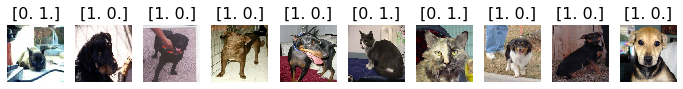

In [8]:
plots(imgs,titles=labels)

In [9]:
#Creating A CNN

In [10]:
model = Sequential([
    Conv2D(32,(3,3), activation='relu',input_shape=(256,256,3)),Flatten(),Dense(2, activation='softmax'),
])

In [11]:
model.compile(Adam(lr=.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
model.fit_generator(train_batches, steps_per_epoch=4,validation_data=valid_batches,validation_steps=4,epochs=5,verbose=2)

Epoch 1/5
 - 3s - loss: 4177.0842 - accuracy: 0.4000 - val_loss: 1347.1080 - val_accuracy: 0.5000
Epoch 2/5
 - 2s - loss: 3007.2008 - accuracy: 0.5250 - val_loss: 2422.1169 - val_accuracy: 0.5000
Epoch 3/5
 - 2s - loss: 2493.1277 - accuracy: 0.4750 - val_loss: 3290.4927 - val_accuracy: 0.5000
Epoch 4/5
 - 2s - loss: 2203.3736 - accuracy: 0.5000 - val_loss: 1735.8370 - val_accuracy: 0.3750
Epoch 5/5
 - 2s - loss: 870.6460 - accuracy: 0.6250 - val_loss: 928.1951 - val_accuracy: 0.5000


c:\users\harshit\appdata\local\programs\python\python37\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


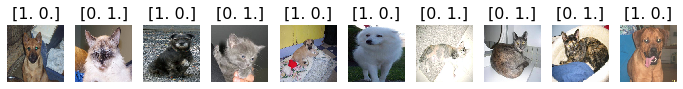

In [16]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs,titles=test_labels)

In [17]:
test_labels = test_labels[:,0]

In [18]:
test_labels

array([1., 0., 1., 0., 1., 1., 0., 0., 0., 1.], dtype=float32)

In [19]:
predictions = model.predict_generator(test_batches, steps=1,verbose=0)

In [20]:
predictions

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [21]:
cm = confusion_matrix(test_labels,predictions[:,0])

In [22]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[5 0]
 [5 0]]


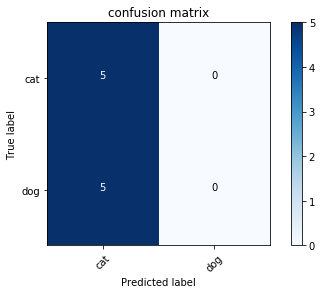

In [23]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm, cm_plot_labels, title='confusion matrix')